In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train = pd.read_csv(r'..\data\final_train_data.csv')

In [31]:
test = pd.read_csv(r'..\data\final_test_data.csv')

In [32]:
train.shape

(891, 41)

In [33]:
test.shape

(418, 40)

## `Splitting into X_train and Y_train and  Scaling`

### Training Data

In [34]:
X= train.drop(labels='Survived',axis=1)

In [35]:
X.shape

(891, 40)

In [36]:
y= train['Survived']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [39]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Test Data

In [40]:
scaled_test = scaler.transform(test)

## `Apply KNeighbour Classifier model`


In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier()

## `Calculate Accuracy`

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = knn.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8268156424581006

In [110]:
accuracy_score(y_train,knn.predict(scaled_X_train))

0.8497191011235955

In [43]:
confusion_matrix(y_test,y_pred)

array([[90,  9],
       [22, 58]], dtype=int64)

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


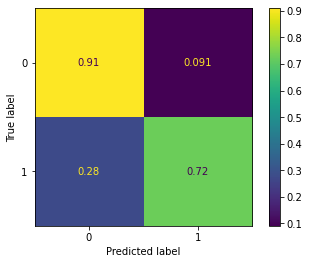

In [44]:
plot_confusion_matrix(knn,scaled_X_test,y_test,normalize='true')

## `Predicting the Test Data`

In [45]:
test_pred = knn.predict(scaled_test)

In [46]:
submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')

In [47]:
submission["Survived"]=test_pred

In [48]:
submission.shape

(418, 2)

In [49]:
submission.to_csv(r"..\Kagle_submissions\Knn.csv",index=False)

## `Grid Search CV`


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
k_values = list(range(1,30))

In [61]:
param_grid = {'n_neighbors':k_values}

In [94]:
knn = KNeighborsClassifier()

In [115]:
full_cv_classifier = GridSearchCV(estimator=knn,param_grid=param_grid,cv=3,scoring='accuracy', verbose=5)

In [116]:
full_cv_classifier.fit(scaled_X_train,y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.790 total time=   0.0s
[CV 2/3] END .....................n_neighbors=1;, score=0.759 total time=   0.0s
[CV 3/3] END .....................n_neighbors=1;, score=0.734 total time=   0.0s
[CV 1/3] END .....................n_neighbors=2;, score=0.756 total time=   0.0s
[CV 2/3] END .....................n_neighbors=2;, score=0.764 total time=   0.0s
[CV 3/3] END .....................n_neighbors=2;, score=0.759 total time=   0.0s
[CV 1/3] END .....................n_neighbors=3;, score=0.794 total time=   0.0s
[CV 2/3] END .....................n_neighbors=3;, score=0.768 total time=   0.0s
[CV 3/3] END .....................n_neighbors=3;, score=0.781 total time=   0.0s
[CV 1/3] END .....................n_neighbors=4;, score=0.777 total time=   0.0s
[CV 2/3] END .....................n_neighbors=4;, score=0.781 total time=   0.0s
[CV 3/3] END .....................n_neighbors=4;

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=5)

In [117]:
full_cv_classifier.best_estimator_

KNeighborsClassifier(n_neighbors=16)

In [118]:
Accuracy=full_cv_classifier.cv_results_['mean_test_score']

In [119]:
len(k_values)

29

In [120]:
len(Accuracy)

29

Text(0, 0.5, 'Accuracy')

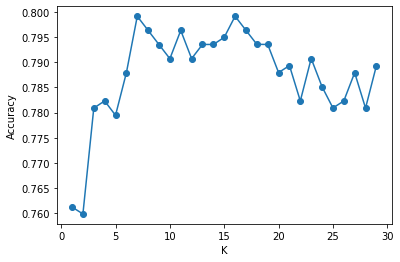

In [121]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [91]:
891*0.8*0.8

570.2400000000001

In [122]:
Accuracy

array([0.76119562, 0.75983642, 0.78088028, 0.78231039, 0.77944427,
       0.78791263, 0.79913484, 0.79632781, 0.79350896, 0.79070784,
       0.7963219 , 0.79072557, 0.79353851, 0.7935326 , 0.79495089,
       0.79914666, 0.79634554, 0.79356215, 0.79353851, 0.78794218,
       0.78933683, 0.78230448, 0.79073739, 0.78512333, 0.78090983,
       0.78229857, 0.78791854, 0.78088028, 0.7893191 ])

In [123]:
best_model = KNeighborsClassifier(**full_cv_classifier.best_estimator_.get_params())


In [124]:
best_model.fit(scaled_X_test, y_test)
accuracy_score(y_test,best_model.predict(scaled_X_test))

0.7653631284916201

### Predict data using best model of grid search cv

In [125]:
test_pred1 = best_model.predict(scaled_test)

In [126]:
submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')

In [127]:
submission["Survived"]=test_pred1

In [128]:
submission.to_csv(r"..\Kagle_submissions\Knn_GSCV.csv",index=False)